<a href="https://colab.research.google.com/github/Tam1979/TATA-ML/blob/master/w3_3b_dnn_intro_lowlevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.1T DNN Intro

This uses the TF Low-level API to do a MLP (Multi-Layer Perceptron) with hidden layers. 

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt



In [0]:
from IPython.display import Image
%matplotlib inline


## Training neural networks efficiently with low-level TensorFlow APIs

In [3]:
## Step 1: Load MNIST data



# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

## Create the Network



In [0]:
# These can be changed if we want.


n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)


In [5]:
# These are our variables and placeholders


# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# This is our model definition.

# Note: 2 x Densely Connected Layers + 1 x Output Layer


# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = multilayer_perceptron(X)


## Train the Model

In [0]:

# HyperParameters (Change these if you want)
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1


In [8]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

epochs = []
losses = []

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        epochs.append(epoch+1)
        losses.append(avg_cost)
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "loss={:.9f}".format(avg_cost))
    print("Training Finished!")
    # Test mode
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    accuracy_out =  accuracy.eval({X: mnist.test.images, Y: mnist.test.labels})



Epoch: 0001 loss=302.571470933
Epoch: 0002 loss=98.913575960
Epoch: 0003 loss=73.027309874
Epoch: 0004 loss=59.163286127
Epoch: 0005 loss=50.223814636
Epoch: 0006 loss=44.157508638
Epoch: 0007 loss=38.374388705
Epoch: 0008 loss=35.030315910
Epoch: 0009 loss=31.909535034
Epoch: 0010 loss=30.078195878
Epoch: 0011 loss=27.217242647
Epoch: 0012 loss=26.397079189
Epoch: 0013 loss=24.495270468
Epoch: 0014 loss=22.797216903
Epoch: 0015 loss=21.948136207
Training Finished!


Text(0.5, 1.0, 'Loss Curve')

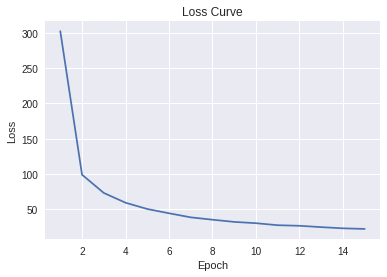

In [9]:
plt.plot(epochs, losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")

In [10]:
## Evaluate the Model

print("Accuracy:", accuracy_out)


Accuracy: 0.8929


## Improvements

Oops! Our accuracy was less than the linear model!  How can that be?

Well, our first attempt might actually be worse.  It's time to make some improvements. This is your turn.

First, we may want to run for more epochs.

We might also want to adjust hyperparameters such as learning rate and batch size.